In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
# choose inputs here to view different data sets
path = "/Users/etmu9498/Desktop/research/sam-tdr/nc-files"

# change paths to look at the folder with data
os.chdir( path)
# nc-data = os.listdir()

nc_data = []
for (dirpath, dirnames, filenames) in os.walk( path):
    nc_data.extend(filenames)
    break
    
# print(nc_data)
print("\n".join( nc_data))


210926H1_2237_vert_inbound.nc
210926H1_2237_vert_outbound.nc
210927H1_2205_vert_inbound.nc
210927H1_2205_vert_outbound.nc
210929H2_2137_vert_inbound.nc
210929H2_2137_vert_outbound.nc


In [12]:
# choose the files you'd like to plot

inbound_name =  nc_data[4] # '210929H2_2137_vert_inbound.nc'
outbound_name =   nc_data[5] # '210929H2_2137_vert_outbound.nc'

In [9]:
# change paths to look at the folder with data
os.chdir( path)

# import data using xarray
inbound_data = xr.open_dataset( inbound_name)
outbound_data = xr.open_dataset( outbound_name)

In [10]:
# find the highest altitude and use that as the max y height
alt_in = inbound_data.variables['altitude']
max_alt_in = alt_in.max().values

alt_out = outbound_data.variables['altitude']
max_alt_out = alt_out.max().values

C:\Users\etmu9498\AppData\Local\Temp/ipykernel_9592/897805869.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh( inbound_data.radius, inbound_data.height, inbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose(), cmap = color_map )


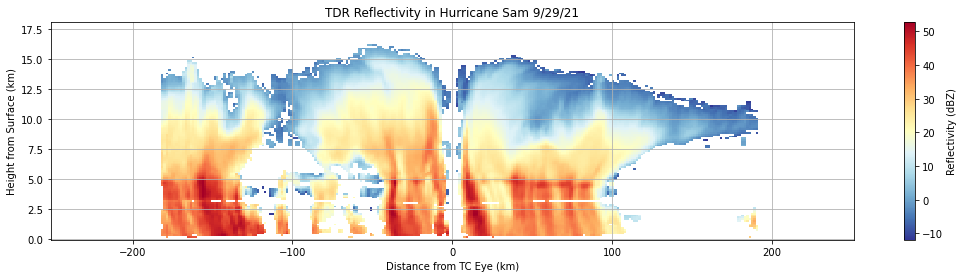

In [11]:
fig = plt.figure( figsize=(18, 4))

# plt.subplot(121)

color_map = plt.cm.get_cmap( "RdYlBu").reversed()

# plot outbound data

xvals = np.linspace( 0, 250, 100)
yvals = max_alt_in * np.ones(( 100))
# plt.plot( -xvals, yvals, color='red', linewidth=3)
                             
plt.pcolormesh( -outbound_data.radius, outbound_data.height, outbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose(), cmap = color_map )
plt.title( 'Outbound Reflectivity in Hurricane Sam')
# plt.colorbar( label="Reflectivity (dBZ)")
plt.ylabel( 'Height from Surface (km)')
plt.grid( 'on')


# Plot inbound data

# plt.subplot(122)

# make a red line through the plot to show flight height
xvals = np.linspace( 0, 250, 100)
yvals = max_alt_in * np.ones(( 100))
# plt.plot( xvals, yvals, color='red', linewidth=3)
                             
plt.pcolormesh( inbound_data.radius, inbound_data.height, inbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose(), cmap = color_map )
plt.title( 'TDR Reflectivity in Hurricane Sam 9/29/21')
plt.colorbar( label="Reflectivity (dBZ)")
plt.ylabel( 'Height from Surface (km)')
plt.xlabel( 'Distance from TC Eye (km)')
plt.grid( 'on')

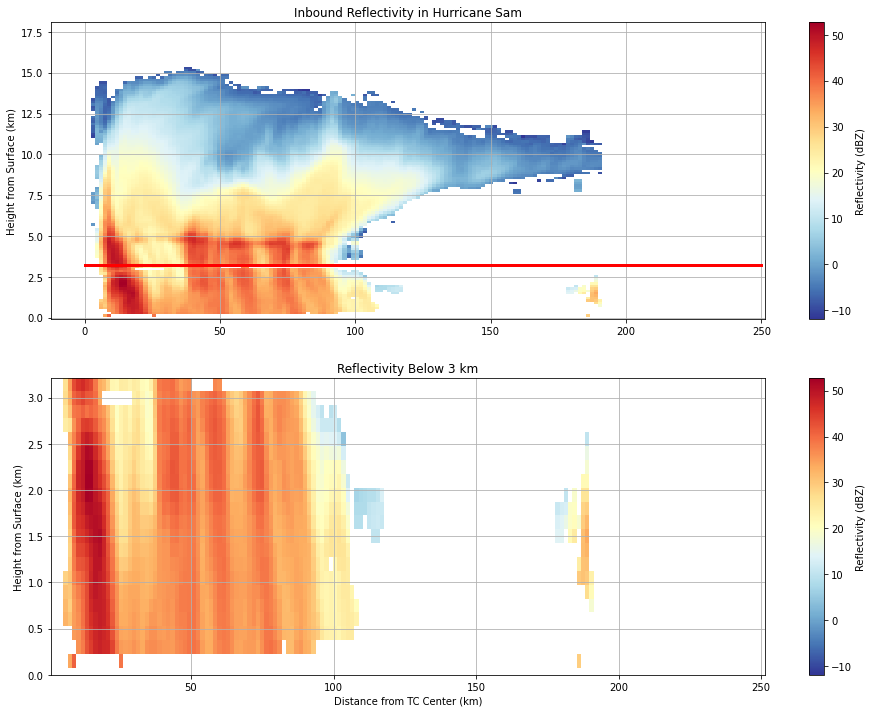

In [27]:
# Plot inbound data

fig = plt.figure( figsize=(16, 12))
plt.subplot(211)
color_map = plt.cm.get_cmap( "RdYlBu").reversed()

# make a red line through the plot to show flight height
xvals = np.linspace( 0, 250, 100)
yvals = max_alt_in * np.ones(( 100))
plt.plot( xvals, yvals, color='red', linewidth=3)
                             
plt.pcolormesh( inbound_data.radius, inbound_data.height, inbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose(), cmap = color_map )
plt.title( 'Inbound Reflectivity in Hurricane Sam')
plt.colorbar( label="Reflectivity (dBZ)")
plt.ylabel( 'Height from Surface (km)')
plt.grid( 'on')

plt.subplot(212)
color_map = plt.cm.get_cmap( "RdYlBu").reversed()

plt.pcolormesh( inbound_data.radius, inbound_data.height, inbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose(), cmap = color_map )
plt.title( 'Reflectivity Below 3 km')
plt.colorbar( label="Reflectivity (dBZ)")
plt.xlabel( 'Distance from TC Center (km)')
plt.ylabel( 'Height from Surface (km)')
plt.ylim( [0, max_alt_in])
plt.grid( 'on')

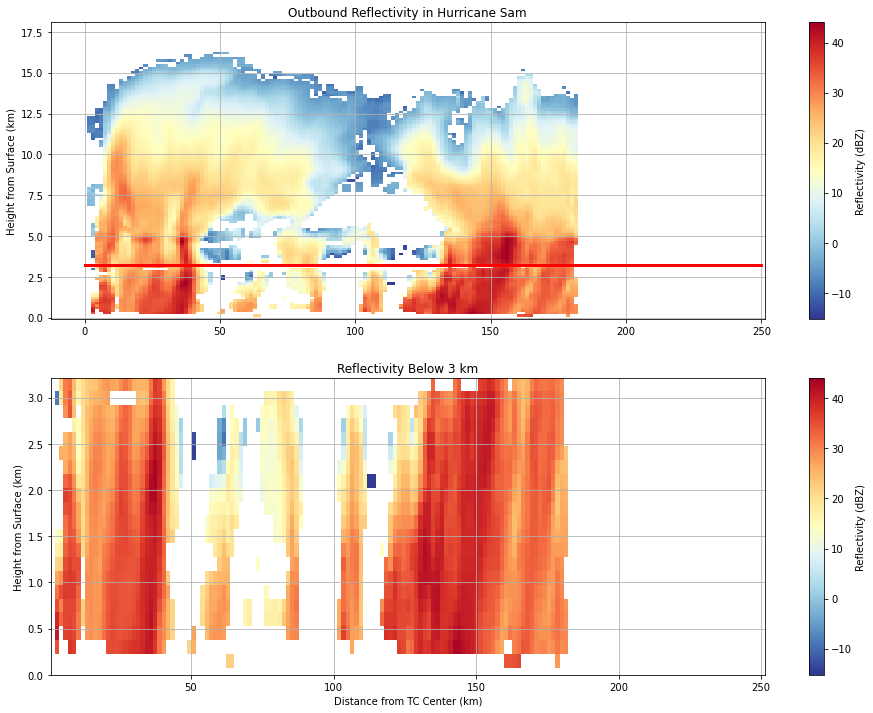

In [28]:
# Plot outbound data

fig = plt.figure( figsize=(16, 12))
plt.subplot(211)
color_map = plt.cm.get_cmap( "RdYlBu").reversed()

# make a red line through the plot to show flight height
xvals = np.linspace( 0, 250, 100)
yvals = max_alt_in * np.ones(( 100))
plt.plot( xvals, yvals, color='red', linewidth=3)
                             
plt.pcolormesh( outbound_data.radius, outbound_data.height, outbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose(), cmap = color_map )
plt.title( 'Outbound Reflectivity in Hurricane Sam')
plt.colorbar( label="Reflectivity (dBZ)")
plt.ylabel( 'Height from Surface (km)')
plt.grid( 'on')

plt.subplot(212)
color_map = plt.cm.get_cmap( "RdYlBu").reversed()

plt.pcolormesh( outbound_data.radius, outbound_data.height, outbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose(), cmap = color_map )
plt.title( 'Reflectivity Below 3 km')
plt.colorbar( label="Reflectivity (dBZ)")
plt.xlabel( 'Distance from TC Center (km)')
plt.ylabel( 'Height from Surface (km)')
plt.ylim( [0, max_alt_in])
plt.grid( 'on')